In [91]:
import itertools
import pandas as pd
import numpy as np
#import networkx
import scipy.optimize
#import cirq
#import winsound
import time
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 
import pandas as pd 
import scipy.special as sp
from matplotlib import pylab
from pylab import figure, text, scatter, show
from scipy import stats
from pylab import *
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [56]:
Vals = np.array(np.loadtxt("NumericalSwimmers.csv"))
forces = np.array(np.loadtxt("ForceList.csv"))
freq = np.array(np.loadtxt("FreqList.csv"))

In [57]:
X1 = Vals[0:2*freq.size:2]
Y1 = np.abs(Vals[1:2*freq.size:2])
X2 = Vals[2*freq.size:4*freq.size:2]
Y2 = np.abs(Vals[2*freq.size+1:4*freq.size:2])
X3 = Vals[4*freq.size:6*freq.size:2]
Y3 = np.abs(Vals[4*freq.size+1:6*freq.size:2])
X4 = Vals[6*freq.size:8*freq.size:2]
Y4 = np.abs(Vals[6*freq.size+1:8*freq.size:2])

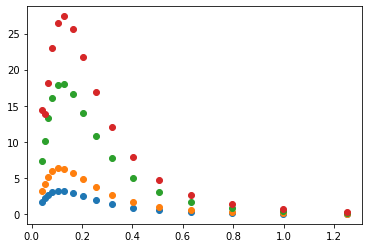

In [58]:
plt.scatter(X1, Y1)
plt.scatter(X2, Y2)
plt.scatter(X3, Y3)
plt.scatter(X4, Y4)

In [59]:
Vals1 = np.array(np.loadtxt("AnalyticalSwimmers.csv"))

In [60]:
X11 = Vals1[0:2*freq.size:2]
Y11 = np.abs(Vals1[1:2*freq.size:2])
X21 = Vals1[2*freq.size:4*freq.size:2]
Y21 = np.abs(Vals1[2*freq.size+1:4*freq.size:2])
X31 = Vals1[4*freq.size:6*freq.size:2]
Y31 = np.abs(Vals1[4*freq.size+1:6*freq.size:2])
X41 = Vals1[6*freq.size:8*freq.size:2]
Y41 = np.abs(Vals1[6*freq.size+1:8*freq.size:2])

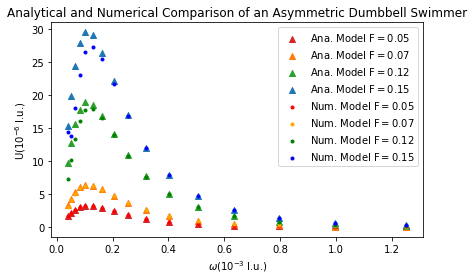

In [90]:
#add axes and title 
#find a few more figures from comparison nb 

plt.xlabel('$\omega$($10^{-3}$ l.u.)')
plt.ylabel('U($10^{-6}$ l.u.)')
plt.title('Analytical and Numerical Comparison of an Asymmetric Dumbbell Swimmer')
plt.scatter(X11, Y11, marker='^', color='tab:red', label='Ana. Model F$=0.05$')
plt.scatter(X21, Y21, marker='^', color='tab:orange', label='Ana. Model F$=0.07$')
plt.scatter(X31, Y31, marker='^', color='tab:green', label='Ana. Model F$=0.12$')
plt.scatter(X41, Y41, marker='^', color='tab:blue', label='Ana. Model F$=0.15$')
plt.scatter(X1, Y1, color='red', marker='.', label='Num. Model F$=0.05$')
plt.scatter(X2, Y2, color='orange', marker='.', label='Num. Model F$=0.07$')
plt.scatter(X3, Y3, color='green', marker='.', label='Num. Model F$=0.12$')
plt.scatter(X4, Y4, color='blue', marker='.', label='Num. Model F$=0.15$')
plt.legend()
plt.tight_layout()
plt.savefig('NumAnaplot-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

In [78]:
forces

array([0.05, 0.07, 0.12, 0.15])

In [92]:
Paraswim1dis = 1e3*np.array(np.loadtxt("ParallelSwimmersSide-swim1-1.csv"))
Paraswim2dis = 1e3*np.array(np.loadtxt("ParallelSwimmersSide1-swim2-1.csv"))
Paraswim1dis2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-1.csv"))
Paraswim2dis2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-1.csv"))
Perpswim1dis3 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim1-1.csv"))
Perpswim2dis3 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim2-1.csv"))
distance = np.array(np.loadtxt("DistancesList.csv"))/28.0
Paraswim1phi = 1e3*np.array(np.loadtxt("ParallelSwimmersSide-swim1-phase.csv"))
Paraswim2phi = 1e3*np.array(np.loadtxt("ParallelSwimmersSide1-swim2-phase.csv"))
Paraswim1phi2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-phase2.csv"))
Paraswim2phi2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-phase2.csv"))
Perpswim1phi3 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim1-phase3.csv"))
Perpswim2phi3 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim2-phase3.csv"))
Paraswim1phi_2 = 1e3*np.array(np.loadtxt("ParallelSwimmersSide-swim1-phase-2.csv"))
Paraswim2phi_2 = 1e3*np.array(np.loadtxt("ParallelSwimmersSide1-swim2-phase-2.csv"))
Paraswim1phi2_2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-phase2-2.csv"))
Paraswim2phi2_2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-phase2-2.csv"))
Perpswim1phi3_2 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim1-phase3-2.csv"))
Perpswim2phi3_2 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim2-phase3-2.csv"))
phase = np.array(np.loadtxt("PhaseList2.csv"))

<ipython-input-119-ddc37d324028>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


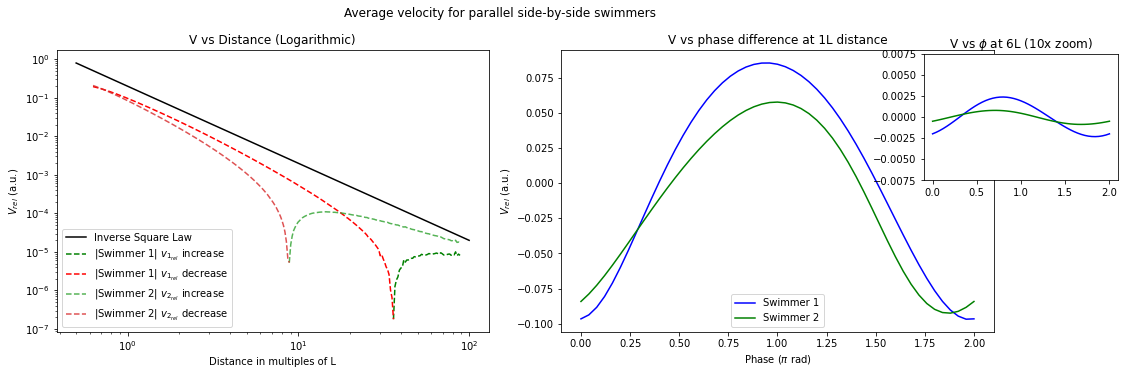

In [119]:
f = plt.figure(figsize=(14, 5.25))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)


v0 = 0.00109542
Vrel11 = ((Paraswim1dis/1e3) - v0)/v0
Vrel21 = ((Paraswim2dis/1e3) - v0)/v0
Vrel11p = ((Paraswim1phi/1e3) - v0)/v0
Vrel21p = ((Paraswim2phi/1e3) - v0)/v0
Vrel11p2 = ((Paraswim1phi_2/1e3) - v0)/v0
Vrel21p2 = ((Paraswim2phi_2/1e3) - v0)/v0

v0 = 0.00109542
Vrel = (((Paraswim1dis[10:275]/1e3) - v0)/v0)
Vrel_2 = (((Paraswim2dis[10:275]/1e3) - v0)/v0)
r = np.linspace(0.5, 100, 1000)
X = 1/r**2

dtrunc = distance[10:275]

#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for parallel side-by-side swimmers")



ax1.loglog(r, X*2e-1, color='k', label="Inverse Square Law")
ax1.loglog(dtrunc[219:], np.abs(Vrel[219:]), ls='--', color='g', label="|Swimmer 1| $v_{1_{rel}}$ increase")
ax1.loglog(dtrunc[:220], np.abs(Vrel[:220]), ls='--', color='r', label="|Swimmer 1| $v_{1_{rel}}$ decrease")
ax1.loglog(dtrunc[148:], np.abs(Vrel_2[148:]), ls='--', color='tab:green', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ increase")
ax1.loglog(dtrunc[:149], np.abs(Vrel_2[:149]), ls='--', color='tab:red', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ decrease")
ax1.legend(loc="lower left")
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance (Logarithmic)')



ax2.plot(phase, Vrel11p, color='b', label='Swimmer 1')
ax2.plot(phase, Vrel21p, color='g', label='Swimmer 2')
ax2.set_ylabel("$V_{rel}$ (a.u.)")
ax2.set_xlabel("Phase ($\pi$ rad)")
ax2.set_title("V vs phase difference at 1L distance")
ax2.legend(loc="lower center")
#ax1.set_size_inches(15, 15, forward=True)
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax2, width="75%", height="90%",
                   bbox_to_anchor=(.7, .52, .6, .5),
                   bbox_transform=ax2.transAxes, loc=4)
axins.plot(phase, Vrel11p2, color='b', label="Swimmer 1")
axins.plot(phase, Vrel21p2,  color='g', label="Swimmer 2")
axins.set_ylim([-0.0075, 0.0075])
axins.set_title("V vs $\phi$ at 6L (10x zoom)")
f.tight_layout()
plt.savefig('ParallelSideSwimmers-2logphase.jpg', format='jpg', bbox_inches='tight', dpi=300)

<ipython-input-120-1b3fb2f6f633>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


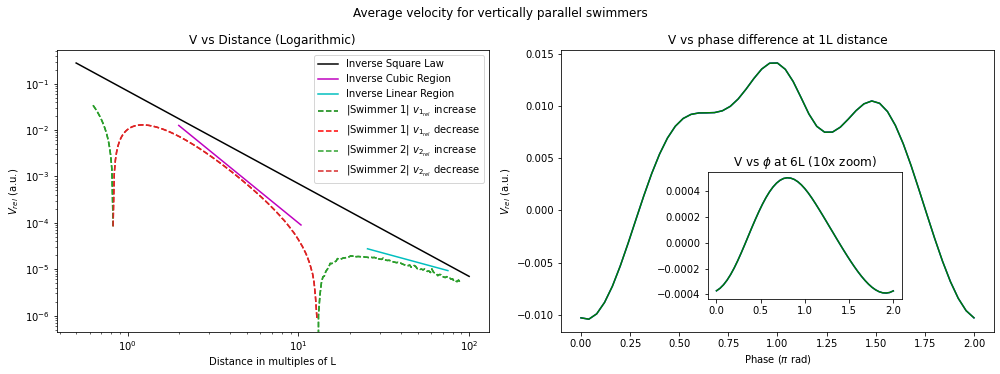

In [120]:
f = plt.figure(figsize=(14, 5.25))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

v0 = 0.00109542
Vrel12 = ((Paraswim1dis2/1e3) - v0)/v0
Vrel22 = ((Paraswim2dis2/1e3) - v0)/v0
Vrel12p = ((Paraswim1phi2/1e3) - v0)/v0
Vrel22p = ((Paraswim2phi2/1e3) - v0)/v0
Vrel12p2 = ((Paraswim1phi2_2/1e3) - v0)/v0
Vrel22p2 = ((Paraswim2phi2_2/1e3) - v0)/v0


Vrel2 = np.array((((Paraswim1dis2[10:275]/1e3) - v0)/v0))
Vrel2_2 = np.array((((Paraswim2dis2[10:275]/1e3) - v0)/v0))
r = np.linspace(0.5, 100, 1000)
X = 1/r**2
Y = 1/r
Z = 1/r**3
dtrunc = np.array(distance[10:275])



f.suptitle("Average velocity for vertically parallel swimmers")

ax1.loglog(r, X*7e-2, color='k', label="Inverse Square Law")
ax1.loglog(r[15:100], Z[15:100]*1e-1, color='m', label='Inverse Cubic Region')
ax1.loglog(r[250:750], Y[250:750]*7e-4, color='c', label='Inverse Linear Region')
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance (Logarithmic)')
ax1.loglog(dtrunc[:19], Vrel2[:19], ls='--', color='g', label="|Swimmer 1| $v_{1_{rel}}$ increase")
ax1.loglog(dtrunc[167:], Vrel2[167:], ls='--', color='g')
ax1.loglog(dtrunc[18:168], np.abs(Vrel2[18:168]), ls='--', color='r', label="|Swimmer 1| $v_{1_{rel}}$ decrease")
ax1.loglog(dtrunc[:19], Vrel2_2[:19], ls='--', color='tab:green', label="|Swimmer 2| $v_{2_{rel}}$ increase")
ax1.loglog(dtrunc[167:], Vrel2_2[167:], ls='--', color='tab:green')
ax1.loglog(dtrunc[18:168], np.abs(Vrel2_2[18:168]), ls='--', color='tab:red', label="|Swimmer 2| $v_{2_{rel}}$ decrease")
ax1.legend(loc="upper right")







ax2.plot(phase, Vrel12p, color='b')
ax2.plot(phase, Vrel22p, color='g')
ax2.set_ylabel("$V_{rel}$ (a.u.)")
ax2.set_xlabel("Phase ($\pi$ rad)")
ax2.set_title("V vs phase difference at 1L distance")
#ax1.set_size_inches(15, 15, forward=True)
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax2, width="75%", height="90%",
                   bbox_to_anchor=(.2, .1, .6, .5),
                   bbox_transform=ax2.transAxes, loc=4)
axins.plot(phase, Vrel12p2,color='b', label="Swimmer 1" )
axins.plot(phase, Vrel22p2, color='g', label="Swimmer 2")
axins.set_title("V vs $\phi$ at 6L (10x zoom)")
f.tight_layout()
plt.savefig('ParallelTopSwimmers-2logphase.jpg', format='jpg', bbox_inches='tight', dpi=300)

<ipython-input-121-887c5d69d800>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


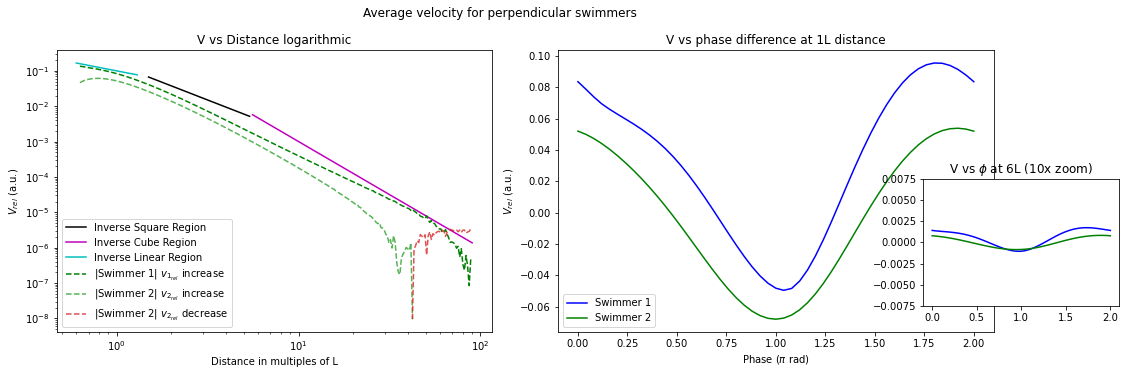

In [121]:
f = plt.figure(figsize=(14, 5.25))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

v0 = 0.00109542
Vrel13 = ((Perpswim1dis3/1e3) - v0)/v0
Vrel23 = ((Perpswim2dis3/1e3) - v0)/v0
Vrel13p = ((Perpswim1phi3/1e3) - v0)/v0
Vrel23p = ((Perpswim2phi3/1e3) - v0)/v0
Vrel13p2 = ((Perpswim1phi3_2/1e3) - v0)/v0
Vrel23p2 = ((Perpswim2phi3_2/1e3) - v0)/v0



Vrel3 = np.array((Perpswim1dis3[10:275]/1e3) - v0)/v0
Vrel3_2 = np.array((Perpswim2dis3[10:275]/1e3) - v0)/v0
r = np.linspace(0.5, 100, 1000)
X = 1/r**2
Y = 1/r**3
Z = 1/r
dtrunc = np.array(distance[10:275])


f.suptitle("Average velocity for perpendicular swimmers")
ax1.loglog(r[10:50], X[10:50]*1.5e-1, color='k', label="Inverse Square Region")
ax1.loglog(r[51:900], Y[51:900], color='m', label="Inverse Cube Region")
ax1.loglog(r[1:9], Z[1:9]*1e-1, color='c', label='Inverse Linear Region')
ax1.loglog(dtrunc, np.abs(Vrel3), color='g', ls='--', label="|Swimmer 1| $v_{1_{rel}}$ increase")
ax1.loglog(dtrunc[:228], np.abs(Vrel3_2[:228]), ls='--', color='tab:green', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ increase")
ax1.loglog(dtrunc[227:], np.abs(Vrel3_2[227:]), ls='--', color='tab:red', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ decrease")
ax1.legend(loc="lower left")
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance logarithmic')





ax2.plot(phase, Vrel13p, color='b', label='Swimmer 1')
ax2.plot(phase, Vrel23p, color='g', label='Swimmer 2')
ax2.set_ylabel("$V_{rel}$ (a.u.)")
ax2.set_xlabel("Phase ($\pi$ rad)")
ax2.set_title("V vs phase difference at 1L distance")
ax2.legend(loc='lower left')
#ax1.set_size_inches(15, 15, forward=True)
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax2, width="75%", height="90%",
                   bbox_to_anchor=(.7, .075, .6, .5),
                   bbox_transform=ax2.transAxes, loc=4)
axins.plot(phase, Vrel13p2, color='b', label="Swimmer 1")
axins.plot(phase, Vrel23p2, color='g', label="Swimmer 2")
axins.set_title("V vs $\phi$ at 6L (10x zoom)")
axins.set_ylim([-0.0075, 0.0075])
f.tight_layout()
plt.savefig('PerpendicularSwimmers-2logphase.jpg', format='jpg', bbox_inches='tight', dpi=300)